<a href="https://colab.research.google.com/github/gtsagkatakis/Data-Science-and-Applications/blob/main/485_Week_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lecture 5: Probability Prior: Applications in Python**

<br>

### In this section, we will learn:

- How to computer some basic statistics of real data
- How to visualize data and its statistical properties
- How sample from Gaussians
- How to learn distributions and probabilistic models from data
- How to update these models in the presence of new data

<br><br>

---

<br>

### **1. Getting real data and retrieving its statistics in various ways:**

#### The infamous Breast Cancer Dataset will be used that can be retrieved through the sklearn python Library

In [ ]:

# Import modules/libraries
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt


# Get data
data = load_breast_cancer(as_frame=True).data

# Printing head and tail of data frame to get some first view
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


- ### Using the describe() function of pandas DataFrame object you can get a summary of the dataset's statistics, which includes:

1. Mean and Standard Deviation (aka std)
2. Min and Max values
3. 25%, 50% (median), and 75% pvalues

In [ ]:
# Getting statistics
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


#### One can also acquire specific statistics, such as the mean by grabbing the feature of interest and calling its **mean()** function

In [ ]:
print(data["mean radius"].mean())
print(data[["mean radius", "mean area"]].mean())

14.127291739894552
mean radius     14.127292
mean area      654.889104
dtype: float64


In [ ]:
# Df shape
print("The shape of our dataset is: ", data.shape)

The shape of our dataset is:  (569, 30)


### - This dataset consists of 569 samples and 30 features. Each features describes some characteristics of each patient, related to breast cancer

#### Let's focus on one of these features:

- Each Feature can be considered a random variable and the feature's values the samples or realizations of this random variable.  
- For example feature1, "mean radius" refers to the mean radius of the patient breast cancerous area and is a measurement. Mean radius can be thought of as a random variable with an underlying distribution.
- When we get a patient in and measure this feature we acquire a sample or a realization of this random variable

#### Let's visualize the "Mean Area" feature


Text(0.5, 0, 'Mean smoothness')

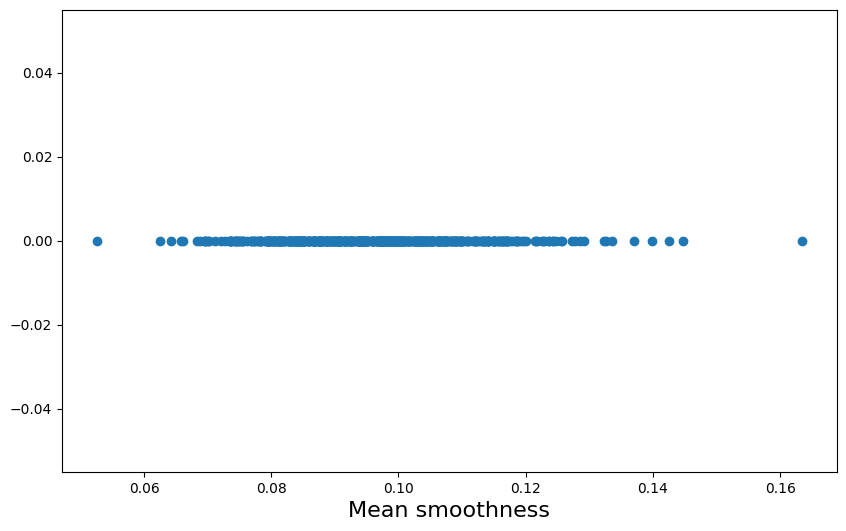

In [ ]:
# Grab feature Series object and convert it to a numpy vector
mean_smoothness = data["mean smoothness"].to_numpy()

# Getting a scatter diagram
fig, axs = plt.subplots(1, 1, figsize=(10, 6))
axs.scatter(mean_smoothness, np.zeros_like(mean_smoothness))
axs.set_xlabel("Mean smoothness", fontsize=16)


Text(0.5, 0, 'Mean Smoothness')

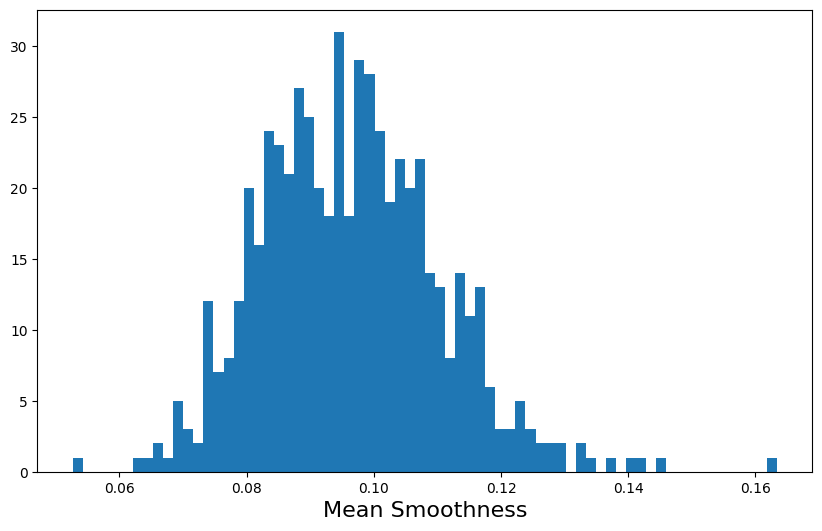

In [ ]:
# Getting a histogram
fig, axs = plt.subplots(1, 1, figsize=(10, 6))
axs.hist(mean_smoothness, bins=70)
axs.set_xlabel("Mean Smoothness", fontsize=16)

#### When we have data we can easily get the **p-values** by definition. For example if we want to calculate the **25% p-value**, we can sort the feature values and get as a 25% p-value the value of index **int(0.25 * len(x))**

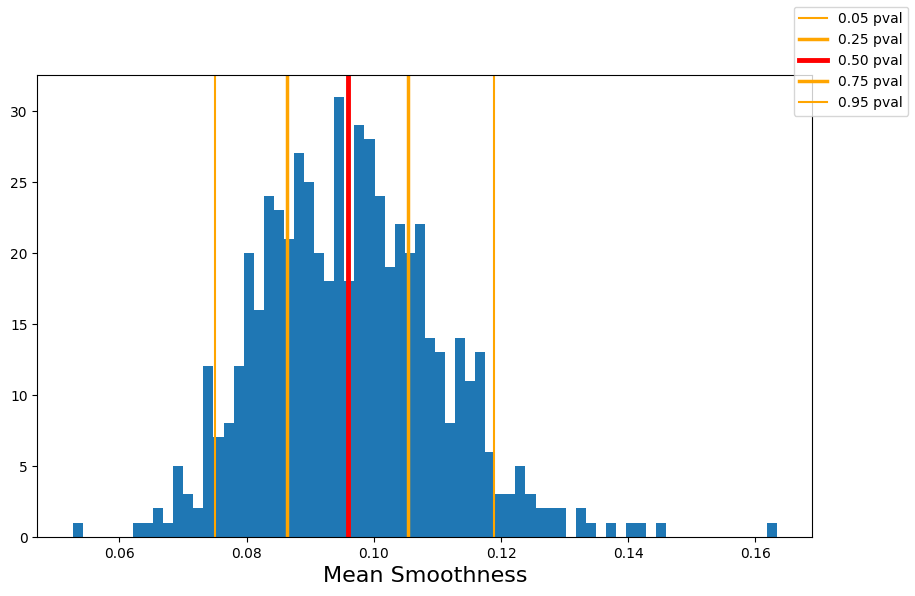

In [ ]:
# Plotting the 0.05, 0.25, 0.5, 0.75 and 0.95 p-values
sorted_mean_smoothness = np.sort(mean_smoothness)
n_samples = len(sorted_mean_smoothness)
p05 = sorted_mean_smoothness[int(0.05 * n_samples)]
p25 = sorted_mean_smoothness[int(0.25 * n_samples)]
p50 = sorted_mean_smoothness[int(0.50 * n_samples)]
p75 = sorted_mean_smoothness[int(0.75 * n_samples)]
p95 = sorted_mean_smoothness[int(0.95 * n_samples)]


# Plotting the same histogram and the p-values as vertical lines
fig, axs = plt.subplots(1, 1, figsize=(10, 6))
axs.hist(mean_smoothness, bins=70)
axs.axvline(p05, color="orange", linewidth=1.5, label="0.05 pval")
axs.axvline(p25, color="orange", linewidth=2.5, label="0.25 pval")
axs.axvline(p50, color="r", linewidth=3.5, label="0.50 pval")
axs.axvline(p75, color="orange", linewidth=2.5, label="0.75 pval")
axs.axvline(p95, color="orange", linewidth=1.5, label="0.95 pval")
axs.set_xlabel("Mean Smoothness", fontsize=16)
fig.legend()

## **!! Notice** that the 0.5 pval is not the mean but the median.

<br>

## Let's compute the mean and std values analytically:

- We know that the sample mean is derived by the following expression:

$$  \hat{\mu}_x = \frac{\sum_{i=1}^{N} x_i}{N}  $$
$$  \hat{\sigma}_x = \sqrt{\frac{\sum_{i=1}^{N} (x_i - \hat{\mu}_x)^2}{N}} $$

### **Note:**
The hat notation $ \hat{\mu}_x $, indicates that we are estimating the distribution mean. The actual mean is yet unknown us and we used the mean estimate above to get a proxy. This estimate is unbiased, meaning that when we get a very large number of samples we approach the actual distribution mean with great certainty

- Let's get them done in python

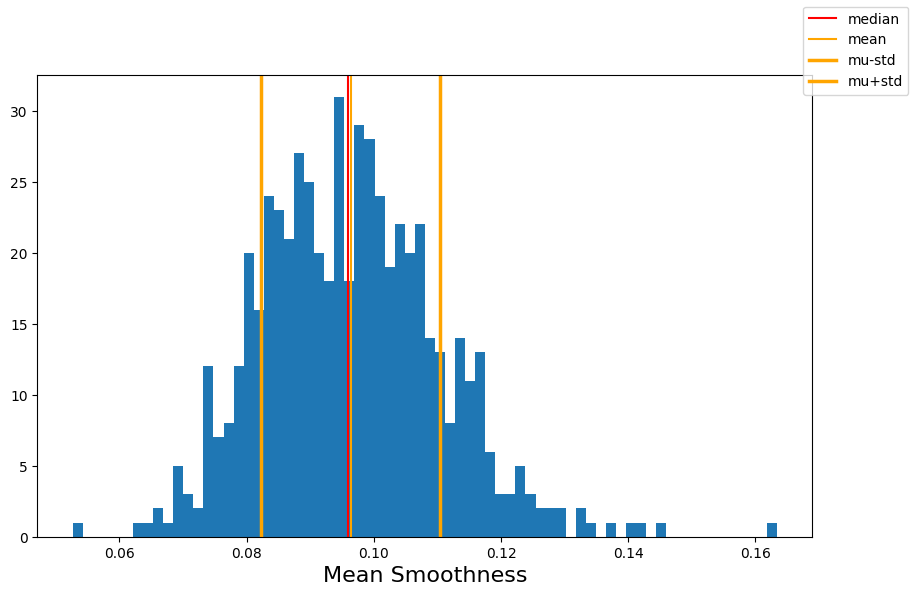

In [ ]:
# Calculate mean and std
mu = np.sum(mean_smoothness) / len(mean_smoothness)
std = np.sqrt((np.sum(np.power(mean_smoothness - mu, 2))) / len(mean_smoothness))


# Plot mean against median and +- std
# Plotting the same histogram and the p-values as vertical lines
fig, axs = plt.subplots(1, 1, figsize=(10, 6))
axs.hist(mean_smoothness, bins=70)
axs.axvline(p50, color="r", linewidth=1.5, label="median")
axs.axvline(mu, linewidth=1.5, color="orange", label="mean")
axs.axvline(mu-std, linewidth=2.5, color="orange", label="mu-std")
axs.axvline(mu+std, linewidth=2.5, color="orange", label="mu+std")
axs.set_xlabel("Mean Smoothness", fontsize=16)
fig.legend()
plt.show()

#### One can easily acquire the 0.05 and 0.95 p-vals assuming a Normal Distribution using the sigma values as follows:

$$p_{0.95} = \mu_x + 1.96\sigma_x$$
$$p_{0.05} = \mu_x - 1.96\sigma_x$$

#### Let's verify by creating a Normal Distributed Random Variable, sampling from it and calculating the p-vals both ways:


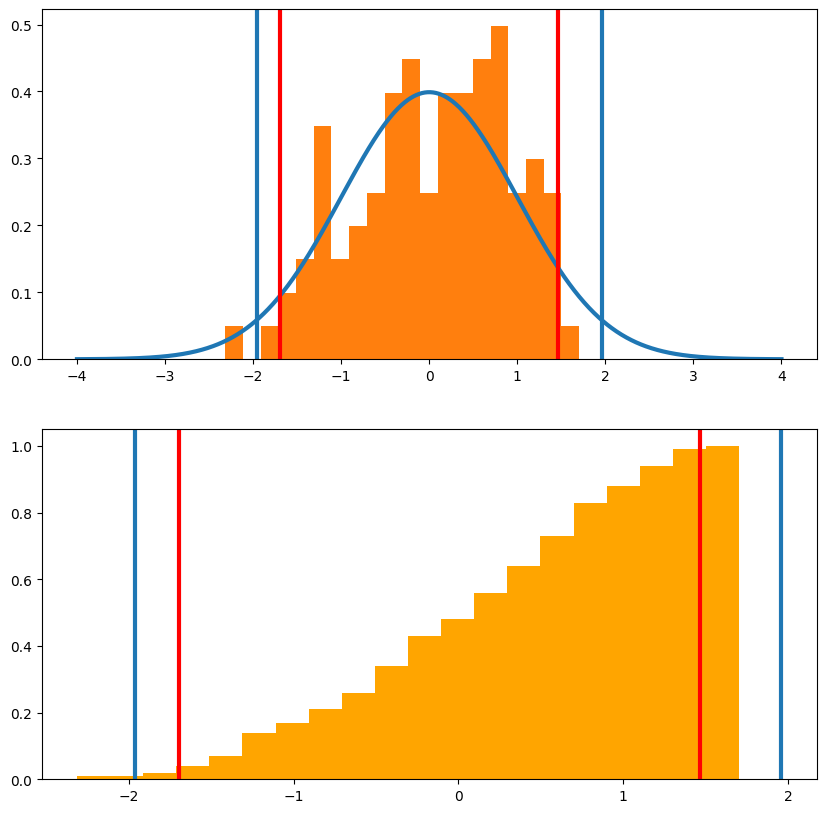

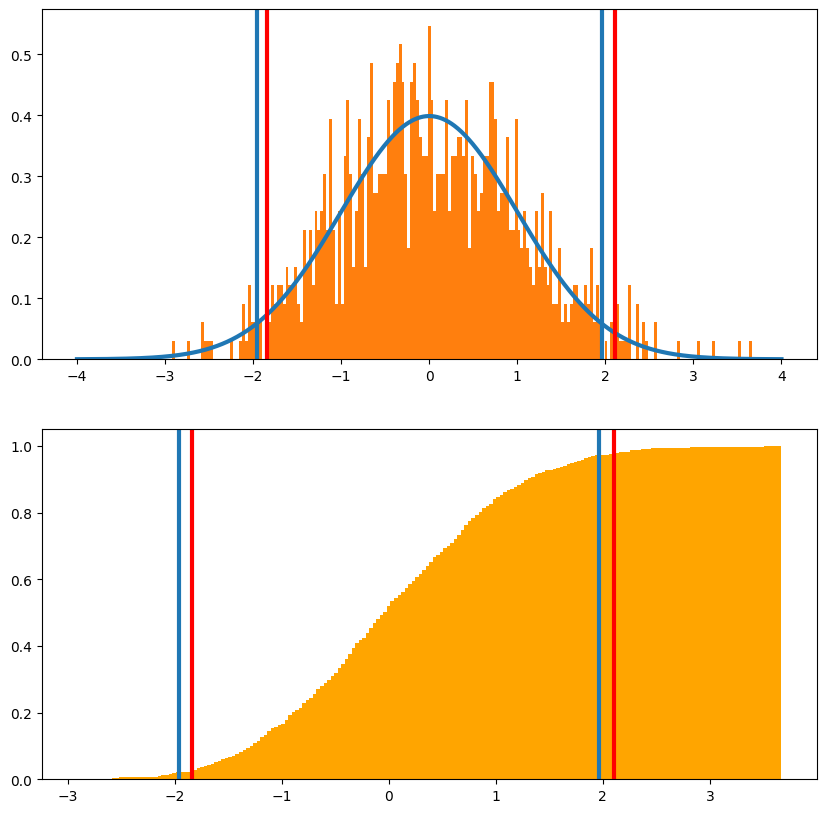

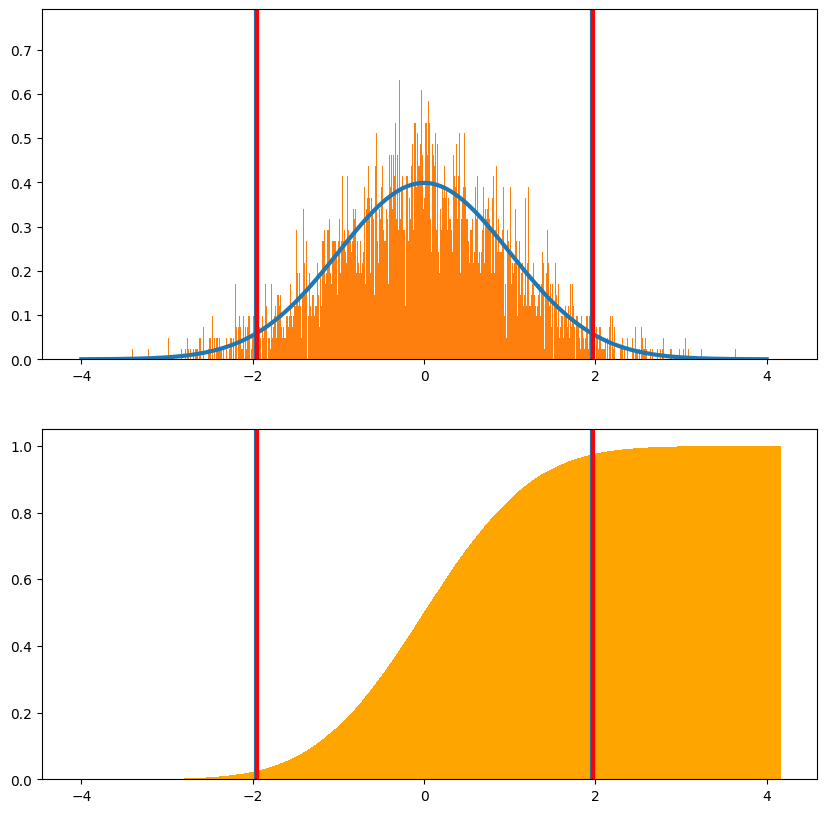

In [ ]:
# Parameters for the Gaussian distribution
mu = 0  # Mean
sigma = 1  # Standard deviation

# Generate points on the x axis
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)

# Calculate the Gaussian function
y = (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

# Calculate the pvals using the known std of the distribution
p025 = 0 - 1.96 * 1
p975 = 0 + 1.96 * 1


for n_samples in [100, 1000, 100000]:
    x_samples = np.random.normal(0, 1, n_samples)
    x_samples_sorted = np.sort(x_samples)
    p025_est = x_samples_sorted[int(0.025 * len(x_samples))]
    p975_est = x_samples_sorted[int(0.975 * len(x_samples))]


    fig, axs = plt.subplots(2, 1, figsize=(10, 10))
    axs[0].plot(x, y, linewidth=3)
    axs[0].hist(x_samples, density=True,bins=n_samples//5)
    axs[0].axvline(p025, linewidth=3)
    axs[0].axvline(p025_est, color="r", linewidth=3)
    axs[0].axvline(p975, linewidth=3)
    axs[0].axvline(p975_est, color="r", linewidth=3)
    axs[1].hist(x_samples, cumulative=True, density=True,bins=n_samples//5, color="orange")
    axs[1].axvline(p025, linewidth=3)
    axs[1].axvline(p025_est, color="r", linewidth=3)
    axs[1].axvline(p975, linewidth=3)
    axs[1].axvline(p975_est, color="r", linewidth=3)
    plt.show()


---

## **2. Sampling:**

### Notice that we can sample from a **Normal (Gaussian)** distributions in numpy by simply calling a function. But what happens under the hood?

<br>

### **Probability Integral Transform**:

#### Assuming $X$ is a continuous Random Variable with $CDF$ given by $F_X(x)$, then the Random Variable $Y = F_X(x)$, has a uniform distribution in $[0, 1]$

![Subdirectory Image](Images/CDF.jpg)

<br>

### **Let's implement it in numpy!**


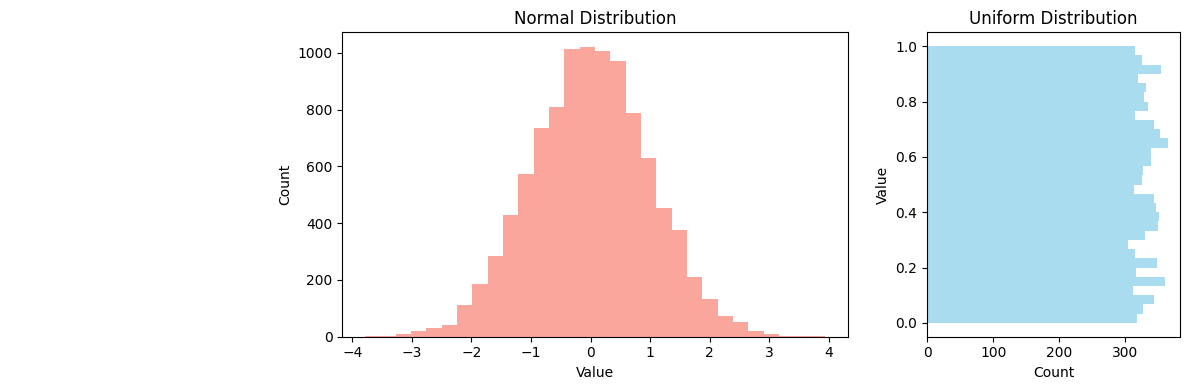

In [ ]:

from scipy.stats import norm

# Step 1: Sample from a uniform distribution
uniform_samples = np.random.uniform(0, 1, 10000)

# Step 2: Transform the uniform samples using the inverse CDF of the normal distribution
normal_samples = norm.ppf(uniform_samples)

# Create a figure and a grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 4),
                        gridspec_kw={'width_ratios': [1, 2, 1]})

# Step 3: Plot the histogram of the uniform samples on the right, oriented horizontally
axs[2].hist(uniform_samples, bins=30, orientation='horizontal', color='skyblue', alpha=0.7)
axs[2].set_title('Uniform Distribution')
axs[2].set_xlabel('Count')
axs[2].set_ylabel('Value')

# Step 4: Plot the histogram of the normal samples in the middle
axs[1].hist(normal_samples, bins=30, color='salmon', alpha=0.7)
axs[1].set_title('Normal Distribution')
axs[1].set_xlabel('Value')
axs[1].set_ylabel('Count')

# Hide the left subplot (not used)
axs[0].axis('off')

plt.tight_layout()
plt.show()


## **3. Maximum Likelihood Estimation:**

- #### Sometimes we have data and we want to esimate the probability distribution. We want to create a probabilistic model of the data.
- #### There are infinitely many functions that have an integral of 1. We need to narrow down the problem a bit. **!! ENTER PARAMETRIC MODELS**
- #### We parametrize the $pdf$ function $f_X(x)$ with a finite number of parameters given by the vector $\vec{\theta}$. Then we describe $f_X(x)$ using this $\vec{\theta}$ vector.

<br>

### **Example: Exponential Distribution**

The exponential distribution is given by the following case dependent expression:

\begin{equation}
f(x|\lambda) =
\begin{cases}
\lambda e^{-\lambda x} & \text{for } x \geq 0 \\
0 & \text{for } x < 0
\end{cases}
\end{equation}

![Subdirectory Image](Images/exponential.png)


Here the functrion is $f(x|\lambda)$ and is fully parametrized by the scalar $\lambda$. That is $\vec{\theta}$ is a vector of only one element. $\lambda$ fully describes the distribution.

We now assume that we observe a random variable by sampling it and we have strong indication that it may come from an exponantial distribution. That means that the above function is a good candidate model and thus we want to find the best instance of this family of functions parametrized by $\lambda$ that best captures the data.


- #### We define the likelihood of a sample given the model (distribution) as: $p(x|\theta) = f_{X,\theta}(x) = \lambda e^{-\lambda x}$
- #### Assuming we have a vector of i.i.d. data (Independent of one another) $\vec{x} = [x_1, x_2, \ldots, x_N]$, we define the likelihood of observing these samples given our model described by $\vec{\theta} = \lambda$, as $\mathbb{L}(\mathbf{x};\lambda) = \prod_{i=1}^{N} \lambda e^{-\lambda x_i}$
- #### We now want to find the value $\lambda$ that generates an exponential function that best describes the data distribution. We do that by maximizing the likelihood above.
- #### Maximizing the likelihood is equivalent to maximizing the Log Likelihood because logarithm is a monotonous function.
- #### We thus formulate our problem as follows:

\begin{align}
argmax_\lambda \prod_{i=1}^{N} \lambda e^{-\lambda x_i} &= argmax_\lambda log(\prod_{i=1}^{N} \lambda e^{-\lambda x_i}) \\
&= argmax_\lambda \sum_{i=1}^{N} log(\lambda e^{-\lambda x_i}) \\
&= argmax_\lambda N*log(\lambda) + \sum_{i=1}^{N} log(e^{-\lambda x_i}) \\
&= argmax_\lambda N*log(\lambda) + \sum_{i=1}^{N} -\lambda x_i \\
\end{align}

- #### This function is convex with respect to $\lambda$ and thus we can find the global maximum by setting the derivative of the function with respect to \lambda to zero:


\begin{equation}
\mathbb{L}(\lambda) = N*log(\lambda) + \sum_{i=1}^{N} -\lambda x_i
\end{equation}

\begin{equation}
\frac{d\mathbb{L}(\lambda)}{d\lambda} = \frac{N}{\lambda}- \sum_{i=1}^{N}x_i
\end{equation}

\begin{equation}
\frac{d\mathbb{L}(\lambda)}{d\lambda} = 0 \Rightarrow \frac{N}{\lambda}- \sum_{i=1}^{N}x_i = 0
\end{equation}

\begin{equation}
\hat{\lambda} = \frac{N}{\sum_{i=1}^{N}x_i}
\end{equation}

- #### Once again notice the hat notation $\hat{\lambda}$. That is because we do not actually know the real $\lambda$ of the distribution that generates the data, but we estimate it through the observed samples.


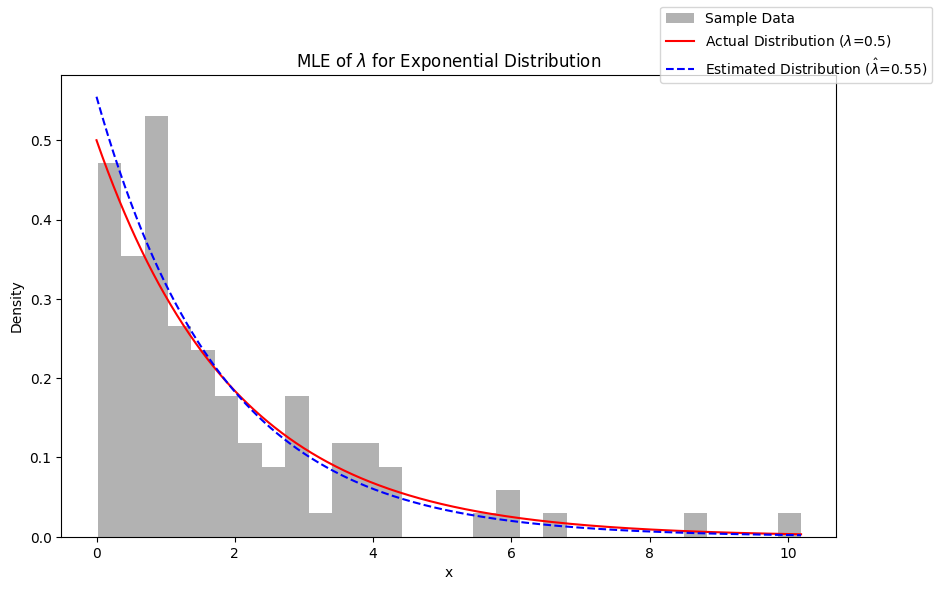

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

# Generating sample data from an exponential distribution
lambda_true = 0.5  # True rate parameter
data = np.random.exponential(1 / lambda_true, 100)  # Note: numpy uses scale = 1/lambda

# Estimating lambda using MLE
lambda_hat = len(data) / np.sum(data)

fig, axs = plt.subplots(1, 1, figsize=(10, 6))

# Plotting the histogram of the sample data
axs.hist(data, bins=30, density=True, alpha=0.6, color='gray', label='Sample Data')

# Plotting the actual and estimated exponential distributions
x = np.linspace(0, np.max(data), 1000)
axs.plot(x, expon.pdf(x, scale=1/lambda_true), 'r-', label=f'Actual Distribution ($\lambda$={lambda_true})')
axs.plot(x, expon.pdf(x, scale=1/lambda_hat), 'b--', label=f'Estimated Distribution ($\hat{{\lambda}}$={lambda_hat:.2f})')

axs.set_title('MLE of $\lambda$ for Exponential Distribution')
axs.set_xlabel('x')
axs.set_ylabel('Density')
fig.legend()
plt.show()


---
## **Homework: Part 1**


- ### There is a generalized family of distributions called Gaussian Mixture Models GMMs (simply a sum of Gaussians), with a $pdf$ given by:

\begin{equation}
p(x) = \sum_{i=1}^{K} w_i \mathbb{N}(x|\mu_i, \sigma_i)
\end{equation}

Where:
1. $K$: is the number of Gaussians
2. $\mu_i, \sigma_i$: are the parameters of each Gaussian
3. $w_i$: is the coefficient (weight) of each Gaussian (mode)
<br>

- ### In order for the GMM to be a distribution the coefficents $w_i$, must sum to one:

\begin{equation}
\sum_{i=1}^{K}w_i = 1
\end{equation}

![Subdirectory Image](Images/gmm.png)


<br><br>

## You are given a GMM model consisting of 3 Gaussians: $\mathbb{N}_1(0, 1), \mathbb{N}_2(-2, 0.5), \mathbb{N}_3(3, 2),$

1. #### Compute the $pdf$ of the GMM analytically using the libraries desribed above and plot the actual $pdfs$.
2. #### Assuming we are given the GMM model, sample from our model using the method we described above in a two-step way.
    First flip a $K$ sided coin to decide from which mode (Gaussian) we are sampling from

    Then, use the exact same trick we had above to samples from the specific Gaussian

    Plot the actual GMMs and the histogram of your samples for different sample sizes (e.g. $100, 1000, 10000$)

    Show that the histogram converges to the actual distribution

    **Hint:** You can use the numpy.random.choice() function and pass in the list of $w_i$ coefficients as the list of probabilities of each mode (Gaussian)


In [ ]:
# Analyticall generate the GMM model pdf







In [ ]:
# Sample from the GMM and store the samples in np.vectors





In [ ]:
# Generate various plots for differnt sample sizes and show the convergence to the actual pdf






---
## **Homework: Part 2**

- #### Use the sklearn Breast Cancer Dataset we used and pick a different feature to analyze that you think is likely to be generated from an underlying Gaussian.

- #### That means you will be assuming that the distribution of the feature you choose is coming from a Gaussian parametrized by the vector:

\begin{equation}
\vec{\theta} = [\mu, \sigma]
\end{equation}

- #### Plot the Histogram of you feature, and the 0.05, 0.25, 0.5, 0.75, 0.95 p-values

- #### Calculate the mean and the std esimates of your feature vector

- #### Use the Maximum Likelihood Estimation we saw before to estimate the parameter vector and thus the Gaussian that best describes the feature vector you selected.

- #### One can easily estimate the Gaussian without the Maximum Likelihood Estimation by simply using the mean and std estimates we saw earlier. Use this simple derivation to compare against the MLE solution. These two should be the same

#### **Hints:** In this case you will have a function of both $\mu$ and $\sigma$. Get the partial derivatives of each one and set them to zero.


In [ ]:
# Select a feature vector, plot its histogram and p-values with vertical axes









In [ ]:
# Derive the Gaussian estimate by simply using the mean and std estimates and plot them against the histogram







In [ ]:
# Use the Maximum Likelihood Estimation (MLE) method to estimate the mean and std. Plot the new estimated Gaussian against the previous and the histogram (They should be the same)








